# Bộ cơ sở dữ liệu Iris (Iris flower dataset).
Iris flower dataset là một bộ dữ liệu nhỏ (nhỏ hơn rất nhiều so với MNIST. Bộ dữ liệu này bao gồm thông tin của ba loại hoa Iris (một loài hoa lan) khác nhau: Iris setosa, Iris virginica và Iris versicolor. Mỗi loại có 50 bông hoa được đo với dữ liệu là 4 thông tin: chiều dài, chiều rộng đài hoa (sepal), và chiều dài, chiều rộng cánh hoa (petal). Dưới đây là ví dụ về hình ảnh của ba loại hoa.
Ví dụ về Iris flower dataset (Nguồn: Wikipedia)

In [20]:
# cần load dataset về và lưu trong forder data
# khai báo thư viên pandas tạo dataframe và  hàm load_iris từ thư viện sklearn.datasets để tải dữ liệu

import pandas as pd
from sklearn.datasets import load_iris

# Tải tập dữ liệu Iris
iris = load_iris()

# Tạo DataFrame từ dữ liệu và nhãn
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target_names[iris.target]

# Thêm cột ID
df.insert(0, 'Id', range(1, len(df) + 1))

# Lưu DataFrame vào một tệp CSV
# Lưu DataFrame vào một tệp CSV trong thư mục chỉ định
file_path = 'D:\Code\May_hoc\data/iris_dataset.csv'
df.to_csv(file_path, index=False)

print("Tập dữ liệu đã được lưu vào: iris_dataset.csv")

Tập dữ liệu đã được lưu vào: iris_dataset.csv


<>:19: SyntaxWarning: invalid escape sequence '\C'
<>:19: SyntaxWarning: invalid escape sequence '\C'
C:\Users\vovan\AppData\Local\Temp\ipykernel_16856\2528966532.py:19: SyntaxWarning: invalid escape sequence '\C'
  file_path = 'D:\Code\May_hoc\data/iris_dataset.csv'


# Tiền xử lý và trực quan hóa dữ liệu

In [21]:
# hiện thị dataset
print(df)

      Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0      1                5.1               3.5                1.4   
1      2                4.9               3.0                1.4   
2      3                4.7               3.2                1.3   
3      4                4.6               3.1                1.5   
4      5                5.0               3.6                1.4   
..   ...                ...               ...                ...   
145  146                6.7               3.0                5.2   
146  147                6.3               2.5                5.0   
147  148                6.5               3.0                5.2   
148  149                6.2               3.4                5.4   
149  150                5.9               3.0                5.1   

     petal width (cm)    Species  
0                 0.2     setosa  
1                 0.2     setosa  
2                 0.2     setosa  
3                 0.2     setosa  
4       

In [22]:
# Thống kê cơ bản về dữ liệu
print(df.describe())


               Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
count  150.000000         150.000000        150.000000         150.000000   
mean    75.500000           5.843333          3.057333           3.758000   
std     43.445368           0.828066          0.435866           1.765298   
min      1.000000           4.300000          2.000000           1.000000   
25%     38.250000           5.100000          2.800000           1.600000   
50%     75.500000           5.800000          3.000000           4.350000   
75%    112.750000           6.400000          3.300000           5.100000   
max    150.000000           7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


Khi muốn nhìn tổng quan dữ liệu và mối tương quan giữa các chiều dữ liệu theo từng cặp với nhau, thì pair plots là lựa chọn vô cùng hoàn hảo (Các features dạng số, hiển nhiên :v)

C:\Users\vovan\AppData\Local\Temp\ipykernel_16856\3871845602.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = grouped_df.apply(lambda x: x.sample(10))


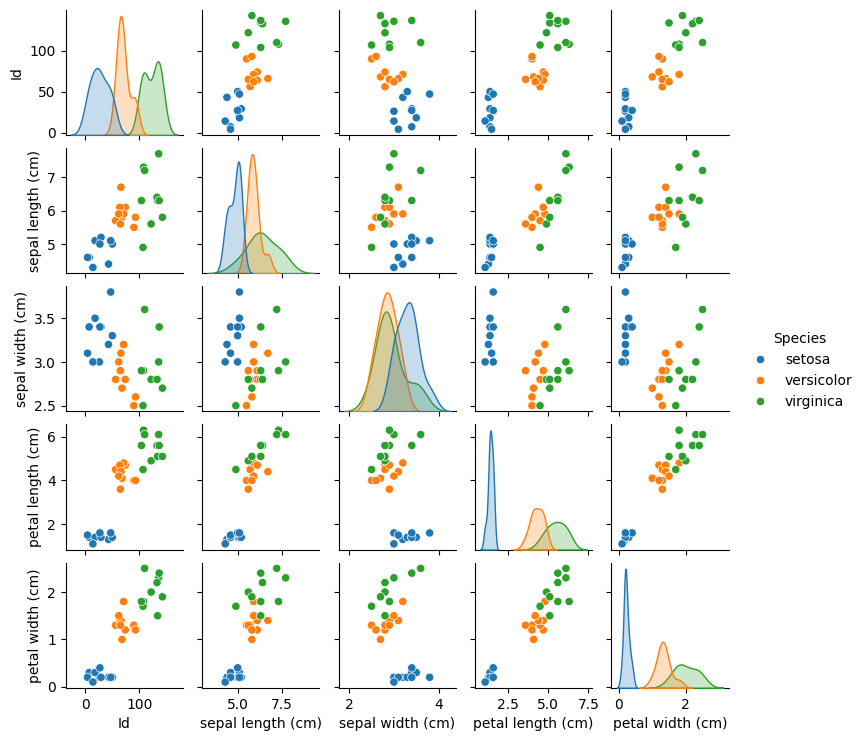

In [23]:
# Phân tích phân phối của các đặc trưng
import seaborn as sns
import matplotlib.pyplot as plt
# mỗi điểm dữ liệu trong biểu đồ đại diện cho một mẫu trong tập dữ liệu
# biểu đồ pairplot này hiển thị sự phân phối của các đặc trưng và mối quan hệ giữa các cặp đặc trưng
#sns.pairplot(df, hue='Species') lấy hết
# để dễ dàng quan sát, nên lấy 10 dòng từ mỗi nhóm hoa để thấy đặc trưng
grouped_df = df.groupby('Species')

# Chọn 10 dòng từ mỗi nhóm
sampled_df = grouped_df.apply(lambda x: x.sample(10))

# Vẽ pairplot cho dữ liệu đã chọn
sns.pairplot(sampled_df, hue='Species',height=1.5)
plt.show()
# >>>Hiểu phân phối của từng đặc trưng, Phát hiện mối quan hệ giữa các cặp đặc trưng,

Trong biểu đồ pairplot này, các điểm dữ liệu được tô màu theo loài hoa tương ứng, giúp chúng ta nhận biết các loài khác nhau trên biểu đồ. Bằng cách này, chúng ta có thể thấy cách các đặc trưng phân phối và tương quan với nhau, cũng như cách chúng phân tán theo từng loài hoa khác nhau. Điều này cung cấp cái nhìn tổng quan về dữ liệu và giúp chúng ta hiểu sâu hơn về mối quan hệ giữa các đặc trưng và các loài hoa trong tập dữ liệu Iris.

In [24]:
# Kiểm tra dữ liệu bị thiếu
print(df.isnull().sum())

Id                   0
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64


# Tách training và test sets
muốn dùng 50 điểm dữ liệu cho test set, 100 điểm còn lại cho training set.

In [25]:
from sklearn.model_selection import train_test_split
import numpy as np
iris_X = iris.data
iris_y = iris.target

# Chia dữ liệu thành 50 điểm dữ liệu cho test set, 100 điểm còn lại cho training set
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=50)

print("Training size:", len(y_train))
print("Test size:", len(y_test))


Training size: 100
Test size: 50


# chuẩn hóa dữ liệu


In [26]:
#chuẩn hóa dữ liệu để (Cải thiện hiệu quả của mô hình,ăng tốc độ huấn luyện,Giúp mô hình tốt hơn...)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #Min-Max Scaling, đưa tất cả các thuộc tính về khoảng giá trị từ 0 đến 1.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Sau khi thực hiện, scaled sẽ chứa dữ liệu đã được chuẩn hóa, sẵn sàng được sử dụng cho các mô hình máy học như K-Nearest Neighbors (KNN) hoặc các thuật toán khác trong scikit-learn. Điều này đảm bảo rằng mỗi đặc trưng trong dữ liệu có cùng tỷ lệ và phân phối, giúp cải thiện hiệu suất của các thuật toán máy học.

# Xây dựng mô hình(với k=1 (1-NN))


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=1)

# Dự đoán  mô hình

=>>dự đoán trên tập kiểm tra

trước hết xét trường hợp đơn giản K = 1, tức là với mỗi điểm test data, ta chỉ xét 1 điểm training data gần nhất và lấy label của điểm đó để dự đoán cho điểm test này.

In [28]:
from sklearn import neighbors, datasets
clf = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Print results for 20 test data points:")
print ("Predicted labels: ", y_pred[20:40])
print ("Ground truth    : ", y_test[20:40])

Print results for 20 test data points:
Predicted labels:  [0 1 2 0 1 2 2 0 2 2 2 0 0 2 1 2 2 2 0 1]
Ground truth    :  [0 1 2 0 1 2 2 0 2 1 2 0 0 2 1 2 2 2 0 1]


Kết quả cho thấy label dự đoán  giống với label thật của test data. Ở đây chúng ta làm quen với khái niệm mới: ground truth. Một cách đơn giản, ground truth chính là nhãn/label/đầu ra thực sự của các điểm trong test data    

# Phương pháp đánh giá 
Để đánh giá độ chính xác của thuật toán KNN classifier này, chúng ta xem xem có bao nhiêu điểm trong test data được dự đoán đúng. Lấy số lượng này chia cho tổng số lượng trong tập test data sẽ ra độ chính xác. Scikit-learn cung cấp hàm số accuracy_score để thực hiện công việc này.

In [29]:
from sklearn.metrics import accuracy_score
print ("Accuracy of 1NN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 1NN: 96.00 %


trong trường hợp này, p = 2 tương ứng với việc sử dụng khoảng cách Euclidean. Khoảng cách Euclidean giữa hai điểm trong không gian nhiều chiều được tính bằng căn bậc hai của tổng bình phương của sự khác biệt giữa các thành phần của hai điểm đó.

In [30]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Accuracy of 10NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 10NN with major voting: 98.00 %


#Điều chỉnh siêu tham số:
mô hình máy học có các siêu tham số cần được điều chỉnh để cải thiện hiệu suất và tránh overfitting.
và sử dụng tìm kiếm ngẫu nhiên (random search) để tìm ra các giá trị tối ưu cho các siêu tham số này.

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Định nghĩa phạm vi các siêu tham số cần tinh chỉnh
param_dist = {'n_neighbors': randint(1, 20), 'p': [1, 2]}

# Tạo một randomized search với mô hình KNeighborsClassifier
random_search = RandomizedSearchCV(neighbors.KNeighborsClassifier(), param_distributions=param_dist, n_iter=10, cv=5)

# Huấn luyện randomized search trên dữ liệu huấn luyện
random_search.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất được tìm thấy
print("Best parameters found:", random_search.best_params_)

# Đánh giá hiệu suất của mô hình tốt nhất trên tập kiểm tra
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy of the best model:", accuracy)
print("Accuracy of 10NN with major voting: %.2f %%" % (100 * accuracy_score(y_test, y_pred)))


Best parameters found: {'n_neighbors': 9, 'p': 2}
Accuracy of 10NN with major voting: 98.00 %


đánh giá mô hình bằng cross-validation: 
(Phương pháp cross-validation (CV) là một kỹ thuật quan trọng trong machine learning để đánh giá hiệu suất của mô hình một cách khách quan và tin cậy. Phương pháp này chia dữ liệu thành các phần nhỏ gọi là "fold", sau đó thực hiện huấn luyện và kiểm tra mô hình trên các fold này.)

In [34]:
from sklearn.model_selection import cross_val_score

# Tạo mô hình KNeighborsClassifier với các siêu tham số tốt nhất được tìm thấy
best_model = random_search.best_estimator_

# Đánh giá hiệu suất của mô hình bằng cross-validation
cv_scores = cross_val_score(best_model, iris_X, iris_y, cv=5)

# In ra độ chính xác trung bình của các fold(fold là một tập hợp con của dữ liệu)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation accuracy: %.2f %%" % (100 * cv_scores.mean()))


Cross-validation scores: [0.96666667 1.         0.96666667 0.93333333 1.        ]
Average cross-validation accuracy: 97.33 %


thực hiện cross-validation với mô hình tốt nhất đã được tìm thấy trên toàn bộ tập dữ liệu Iris và tính độ chính xác trung bình của các fold.

# Triển khai mô hình:

In [33]:
# Sử dụng mô hình tốt nhất đã được huấn luyện trên toàn bộ dữ liệu huấn luyện
best_model.fit(iris_X, iris_y)

# Dự đoán nhãn cho các điểm dữ liệu mới
new_data = [[5.1, 3.5, 1.4, 0.2], [6.3, 2.9, 5.6, 1.8], [7.2, 3.6, 6.1, 2.5]]
predicted_labels = best_model.predict(new_data)

# In ra kết quả dự đoán
for i, data in enumerate(new_data):
    print("Data:", data, "Predicted label:", iris.target_names[predicted_labels[i]])


Data: [5.1, 3.5, 1.4, 0.2] Predicted label: setosa
Data: [6.3, 2.9, 5.6, 1.8] Predicted label: virginica
Data: [7.2, 3.6, 6.1, 2.5] Predicted label: virginica
